In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

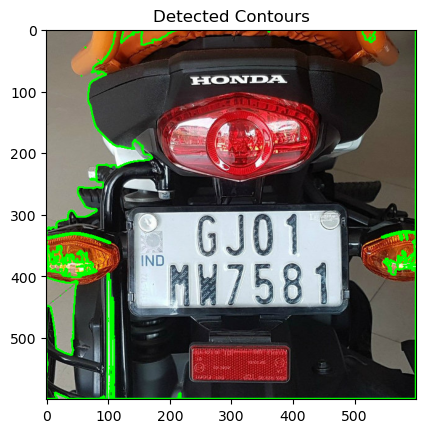

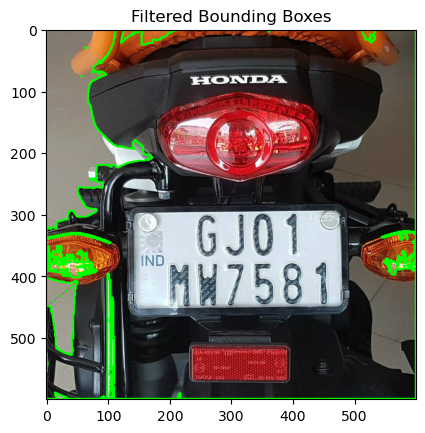

⚠️ No characters detected! Try adjusting thresholding or filtering conditions.


In [5]:

def segment_characters(plate_image):
    # Convert to grayscale
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    character_images = []
    bounding_boxes = []

    # Debug: Show detected contours
    plate_copy = plate_image.copy()
    cv2.drawContours(plate_copy, contours, -1, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(plate_copy, cv2.COLOR_BGR2RGB))
    plt.title("Detected Contours")
    plt.show()

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Debug: Show each detected bounding box
        cv2.rectangle(plate_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Filter based on size (adjust these values if characters are missing)
        if 20 < h < 100 and 10 < w < 80:  # Relax these values if necessary
            char_img = gray[y:y+h, x:x+w]
            char_img = cv2.resize(char_img, (32, 32))  # Resize for model input
            character_images.append(char_img)
            bounding_boxes.append((x, y, w, h))

    # Show bounding boxes after filtering
    plt.imshow(cv2.cvtColor(plate_copy, cv2.COLOR_BGR2RGB))
    plt.title("Filtered Bounding Boxes")
    plt.show()

    # Sort characters left to right
    sorted_chars = [char for _, char in sorted(zip(bounding_boxes, character_images), key=lambda b: b[0][0])]

    return sorted_chars

# Load the real license plate image
plate_image = cv2.imread("C:\\Users\\Nameet\\Number Plate Recognition\\scanned_images\\scaned_img_1.jpg")  # Replace with your image path

# Extract characters
characters = segment_characters(plate_image)

# Check if characters were detected
if len(characters) == 0:
    print("⚠️ No characters detected! Try adjusting thresholding or filtering conditions.")
else:
    # Display segmented characters
    fig, axes = plt.subplots(1, len(characters), figsize=(10, 2))
    for i, char in enumerate(characters):
        axes[i].imshow(char, cmap='gray')
        axes[i].axis('off')
    plt.show()

In [21]:
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("ocr_model.h5")  # Path to your saved model

# Class labels (0-9 and A-Z)
class_labels = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def predict_character(image, model):
    # Preprocess image
    img = np.array(image).reshape(1, 32, 32, 1) / 255.0  # Normalize
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return class_labels[predicted_class]

# Predict each character
license_plate_text = "".join([predict_character(char, model) for char in characters])

print(f"Predicted License Plate: {license_plate_text}")

Predicted License Plate: 
